# EDA on `PROPERTY_TYPE`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helpers.data import summary
from helpers import constants as C

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("data/processed/gurgaon_10k.csv").sort_values("PRICE").reset_index(drop=True)
print(df.shape)
df.head()

(10162, 33)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
0,70480214,j70480214,gurgaon,5500.0,15.0,350.0,3.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,Unfurnished,North-East,1-5 Year Old Property,<15,1.0,signature global solera 2,2.0,<15,28.512525,76.973543,1.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1.0,0.0,0.0,0.0,0.0,2.0,86,44
1,70794112,u70794112,gurgaon,7000.0,10.0,700.0,15.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,East,1-5 Year Old Property,<15,1.0,rof ananda,1.0,<15,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,218,3.0,0.0,0.0,0.0,0.0,12.0,63,43
2,70607360,o70607360,gurgaon,7500.0,14.0,514.0,3.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,Unfurnished,North-East,0-1 Year Old Property,<15,2.0,signature global solera 2,1.0,<15,28.512525,76.973543,2.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1.0,0.0,0.0,0.0,0.0,2.0,76,58
3,69621256,s69621256,gurgaon,8500.0,8.0,980.0,3.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,Unfurnished,North,1-5 Year Old Property,<15,2.0,ramsons kshitij,1.0,<15,28.416679,76.902677,2.0,sector 95 gurgaon,ramsons kshitij,ramsons kshitij,NaN,0.0,0.0,0.0,0.0,3.0,0.0,99,67
4,70794066,j70794066,gurgaon,8500.0,8.0,980.0,3.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,Semifurnished,East,1-5 Year Old Property,<15,2.0,ramsons kshitij,1.0,<15,28.416679,76.902677,2.0,sector 95 gurgaon,ramsons kshitij,ramsons kshitij,512,0.0,0.0,0.0,0.0,3.0,0.0,77,51


In [4]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
farm house                    120
serviced apartments            10
Name: count, dtype: int64

In [5]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE'],
      dtype='object')

## General Step - Start

In [6]:
drop_cols = [
    "SPID",
    "TOTAL_LANDMARK_COUNT",
    "LATITUDE",
    "LONGITUDE",
    "FACING",
    "AGE",
    "BHK_BED",
    "FLOOR_NUM",
    "TOTAL_FLOOR",
    "BALCONY_NUM",
    "FURNISH",
    "LOCALITY_NAME",
    "BUILDING_NAME",
    "SOCIETY_NAME",
    "ADDRESS",
    "TRANSPORATION",
    "ACCOMODATION",
    "LEISURE",
    "EDUCATION",
    "HEALTH",
    "OTHER",
    "AMENITIES_SCORE",
    "FEATURES_SCORE",
]
drop_index = df.query("PROPERTY_TYPE==['farm house', 'serviced apartments']").index
df = df.drop(columns=drop_cols, index=drop_index, errors="ignore").reset_index(drop=True)

print(df.shape)
df.head()

(10032, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,j70480214,gurgaon,5500.0,15.0,350.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,1.0,signature global solera 2
1,u70794112,gurgaon,7000.0,10.0,700.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,1.0,rof ananda
2,o70607360,gurgaon,7500.0,14.0,514.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,2.0,signature global solera 2
3,s69621256,gurgaon,8500.0,8.0,980.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,2.0,ramsons kshitij
4,j70794066,gurgaon,8500.0,8.0,980.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,2.0,ramsons kshitij


### Data Preprocessing

In [7]:
imp_cols = ["PRICE", "AREA", "PRICE_SQFT"]

In [8]:
df["PRICE"] = df["PRICE"].div(C.LAKH)
df["PROP_ID"] = "https://99acres.com/" + df["PROP_ID"].str.upper()

## Whole Dataset Analysis

### PRICE Analysis

In [9]:
temp = df.query("PRICE>1500").sort_values("PRICE")
print(temp.shape)
temp.head()

(91, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
9941,https://99acres.com/S69959820,gurgaon,1510.0,200265.0,8115.0,5 bedroom house in sector 66 gurgaon,500 yards villa in most happening villa community,independent house/villa,5.0,emaar mgf marbella
9942,https://99acres.com/D70925786,gurgaon,1515.0,301792.0,4518.0,residential land / plot in sector 26 gurgaon,urgent for sale confirm deals nice location ne...,residential land,NaN,dlf city phase 1
9943,https://99acres.com/J70830648,gurgaon,1544.0,160000.0,8685.0,residential land / plot in block b sushant lok...,residential plot in sushant lok 3 b block grea...,residential land,NaN,NaN
9944,https://99acres.com/M70255380,gurgaon,1575.0,313745.0,4518.0,residential land / plot in dlf phase 1,confirm plot 12 meter road near by park call f...,residential land,NaN,NaN
9945,https://99acres.com/K70750120,gurgaon,1592.0,210000.0,6822.0,residential land / plot in sector 65 gurgaon,"excellent location, east facing 758 sq yd plot...",residential land,NaN,emaar emerald hills


<Axes: xlabel='PRICE'>

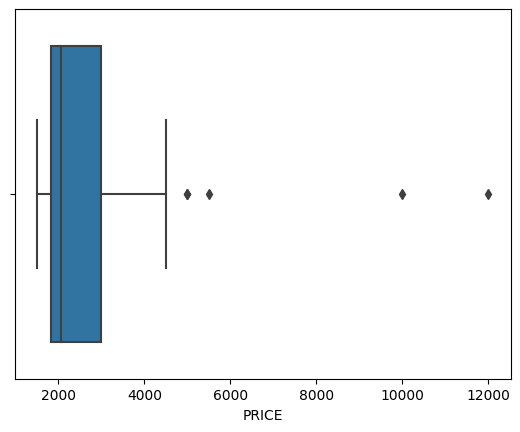

In [10]:
sns.boxplot(x=temp["PRICE"])

<Axes: xlabel='AREA'>

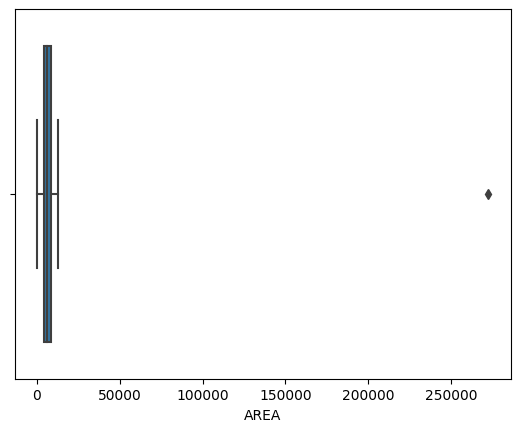

In [11]:
sns.boxplot(x=temp["AREA"])

In [12]:
temp.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
10027,https://99acres.com/B70877280,gurgaon,5000.0,67851.0,7369.0,4 bhk flat in sector 42 gurgaon,luxury deals by expert 7400 sq ft exclusive ...,residential apartment,4.0,dlf the camellias
10028,https://99acres.com/F70270684,gurgaon,5000.0,67567.0,7400.0,4 bhk flat in sector 42 gurgaon,dlf the camellias is one of the most popular d...,residential apartment,4.0,dlf the camellias
10029,https://99acres.com/G23798278,gurgaon,5500.0,43478.0,11500.0,5 bhk flat in sector 42 gurgaon,"for sale - penthouse, in dlf - the magnolias, ...",residential apartment,5.0,dlf the magnolias
10030,https://99acres.com/T70231990,gurgaon,10000.0,160000000.0,272250.0,residential land / plot in sector 78 gurgaon,available for sale 6.25 acres rate of 16cr per...,residential land,NaN,"shikopur village sector 78, gurgaon"
10031,https://99acres.com/X69963388,gurgaon,12000.0,843288.0,1423.0,3 bhk independent builder floor in sector 89 g...,the newly constructed low rise floors with com...,independent/builder floor,3.0,m3m soulitude


#### Dropping the properties with `PRICE>25 Cr`.

In [13]:
temp = df.query("PRICE>2500")
print(temp.shape)
temp.head()

(32, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
10000,https://99acres.com/M70954334,gurgaon,2555.0,72974.0,3494.5,4 bhk independent builder floor in sector 92 g...,"dlf garden city floors in sector-92, gurgaon b...",independent/builder floor,4.0,dlf garden city floors
10001,https://99acres.com/G70382180,gurgaon,2600.0,260000.0,9000.0,residential land / plot in dlf phase 2,available for sale 1000 sq.yrd plot area with ...,residential land,NaN,NaN
10002,https://99acres.com/W70253592,gurgaon,2600.0,46428.0,5600.0,4 bhk flat in sector 42 gurgaon,dlf the aralias is one of the most popular des...,residential apartment,4.0,dlf the aralias
10003,https://99acres.com/X70782908,gurgaon,2650.0,41406.0,6400.0,4 bhk flat in sector 42 gurgaon,located in the popular residential address of ...,residential apartment,4.0,dlf the magnolias
10004,https://99acres.com/W70158776,gurgaon,2900.0,290000.0,9000.0,residential land / plot in south city 1,"1000yds plot at prime location of e-block, eas...",residential land,NaN,NaN


In [14]:
df = df.query("PRICE<2500")
print(df.shape)
summary.custom_describe(df[imp_cols])

(9994, 10)


,PRICE,AREA,PRICE_SQFT
count,9994.000,9994.000,9.994000e+03
mean,228.097,2787.078,6.784376e+04
std,265.145,14169.791,1.173748e+06
min,0.055,30.000,0.000000e+00
1%,0.180,360.000,1.200000e+01
5%,0.320,900.000,1.900000e+01
25%,1.662,1587.250,1.830000e+02
50%,170.000,2067.000,1.000000e+04
75%,320.000,2700.000,1.750000e+04
95%,700.000,4500.000,1.860434e+05


<Axes: xlabel='PRICE'>

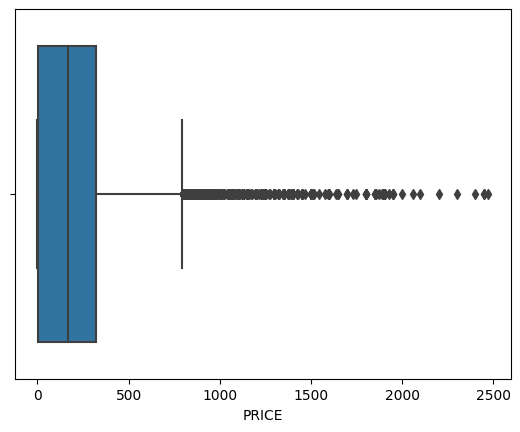

In [15]:
sns.boxplot(x=df["PRICE"])

<Axes: xlabel='AREA'>

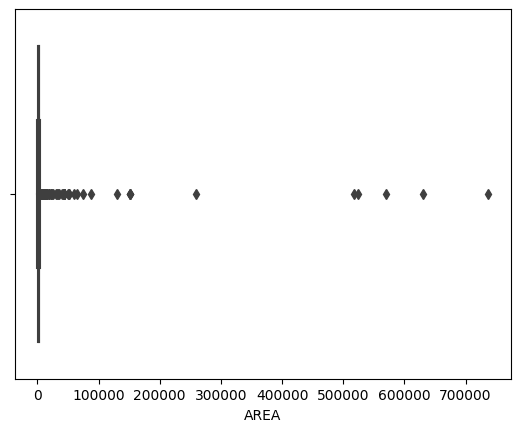

In [16]:
sns.boxplot(x=df["AREA"])

### AREA Analysis

In [17]:
temp = df.query("AREA>@C.LAKH")
print(temp.shape)
temp["PROPERTY_TYPE"].value_counts()

(10, 10)


PROPERTY_TYPE
residential apartment    9
residential land         1
Name: count, dtype: int64

<Axes: xlabel='PRICE'>

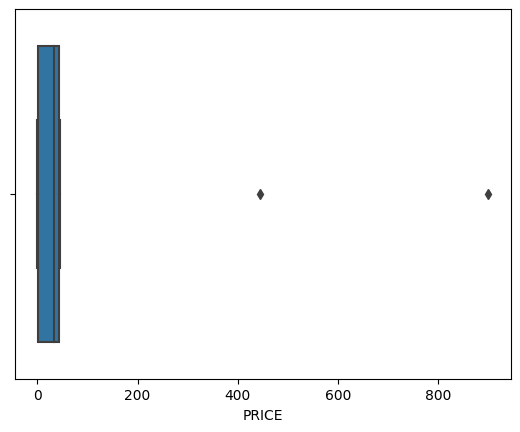

In [18]:
sns.boxplot(x=temp["PRICE"])

<Axes: xlabel='AREA'>

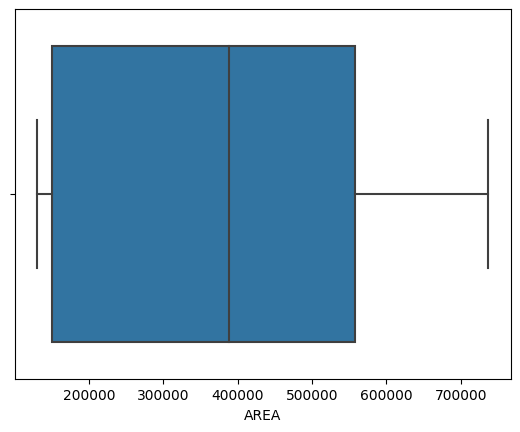

In [19]:
sns.boxplot(x=temp["AREA"])

In [20]:
temp.head()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
54,https://99acres.com/N70743820,gurgaon,0.15,0.0,517967.0,2 bhk flat in sohna,semi furnished flat for rent in serenas it's a...,residential apartment,2.0,signature the serenas
1588,https://99acres.com/E70088242,gurgaon,0.60,0.0,150826.0,2 bhk flat in sector 62 gurgaon,a 2 bhk flat for rent in sector 62 gurgaon clo...,residential apartment,2.0,emaar digihomes
1733,https://99acres.com/E71005386,gurgaon,0.65,0.0,150826.0,2 bhk flat in sector 62 gurgaon,a 2 bhk flat for rent in sector 62 gurgaon clo...,residential apartment,2.0,emaar digihomes
1818,https://99acres.com/A70832332,gurgaon,0.70,0.0,150826.0,2 bhk flat in sector 62 gurgaon,best property with best connectivity.,residential apartment,2.0,emaar digihomes
2758,https://99acres.com/E70499544,gurgaon,27.50,3.0,737147.0,2 bhk flat in sohna,sohna good location nearby school gym park col...,residential apartment,2.0,hcbs sports ville


#### Dropping properties with `AREA>1 Lakh sq.ft.`

(9984, 10)


<Axes: xlabel='AREA'>

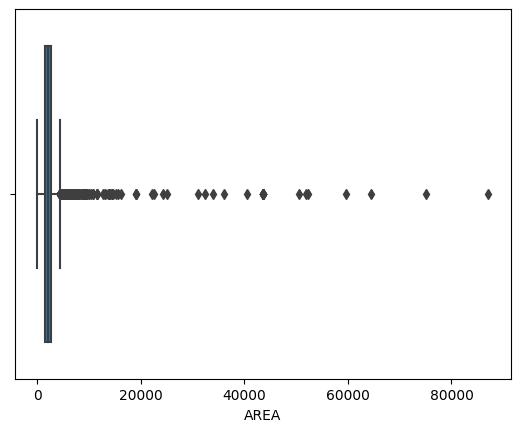

In [21]:
df = df.query("AREA<@C.LAKH")
print(df.shape)
sns.boxplot(x=df["AREA"])

In [22]:
print(df.shape)
summary.custom_describe(df[imp_cols])

(9984, 10)


,PRICE,AREA,PRICE_SQFT
count,9984.000,9984.000,9.984000e+03
mean,228.175,2407.126,6.791107e+04
std,265.117,2561.070,1.174334e+06
min,0.055,30.000,0.000000e+00
1%,0.180,360.000,1.300000e+01
5%,0.320,900.000,1.900000e+01
25%,1.700,1587.000,1.930000e+02
50%,170.000,2066.000,1.000000e+04
75%,320.000,2700.000,1.751775e+04
95%,700.000,4500.000,1.860954e+05


### Conclusion

- Removed properties with `PRICE>25 Cr` and `AREA>1 Lakh sq.ft.`.
- Now, the dataset better than before due to removal of extreme outliers.

#### Thoughts ;)

- Why the properties have `AREA` more than `1 Lakh sq. ft.`, I don't think this is possible.
- Handle the properties with `PRICE` lesser than `₹ 1 Lakh`.

## Split dataset on `PROPERTY_TYPE`

In [23]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5921
independent/builder floor    2467
residential land              979
independent house/villa       617
Name: count, dtype: int64

In [24]:
res_apartment = (
    df.query("PROPERTY_TYPE=='residential apartment'").sort_values("PRICE").reset_index(drop=True)
)
ind_floor = (
    df.query("PROPERTY_TYPE=='independent/builder floor'")
    .sort_values("PRICE")
    .reset_index(drop=True)
)
res_land = df.query("PROPERTY_TYPE=='residential land'").sort_values("PRICE").reset_index(drop=True)
ind_house = (
    df.query("PROPERTY_TYPE=='independent house/villa'").sort_values("PRICE").reset_index(drop=True)
)

In [25]:
print(f"{res_apartment.shape = }")
print(f"{ind_floor.shape = }")
print(f"{res_land.shape = }")
print(f"{ind_house.shape = }")

res_apartment.shape = (5921, 10)
ind_floor.shape = (2467, 10)
res_land.shape = (979, 10)
ind_house.shape = (617, 10)


## Residential Apartment

In [26]:
print(res_apartment.shape)
summary.custom_describe(res_apartment[imp_cols])

(5921, 10)


,PRICE,AREA,PRICE_SQFT
count,5921.000,5921.000,5921.000
mean,183.506,2251.219,8519.576
std,217.666,1990.989,11005.113
min,0.055,256.000,0.000
1%,0.160,561.800,12.000
5%,0.295,915.000,17.000
25%,0.835,1588.000,41.000
50%,141.000,1999.000,8183.000
75%,255.000,2588.000,12357.000
95%,580.000,3950.000,20300.000


<Axes: xlabel='PRICE'>

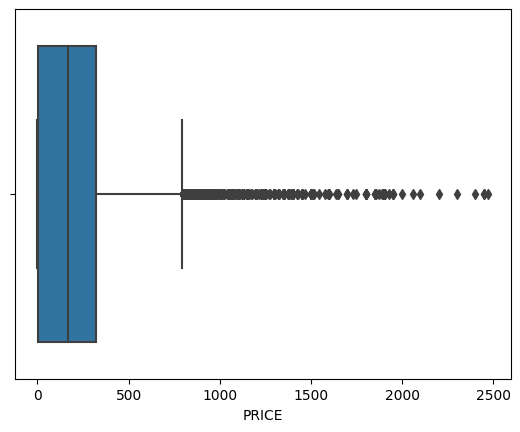

In [27]:
sns.boxplot(x=df["PRICE"])

### Extract `Rental Apartments`

In [28]:
# Assumption on ``PRICE`` for a rental properties
rent_res_apartment = (
    pd.concat(
        [
            res_apartment[
                res_apartment["DESCRIPTION"].str.contains(" rent ") & (res_apartment["PRICE"] < 20)
            ],
            res_apartment.query("PRICE<5"),
        ]
    )
    .drop_duplicates()
    .sort_values("PRICE")
    .reset_index(drop=True)
)
print(rent_res_apartment.shape)
summary.custom_describe(rent_res_apartment[imp_cols])

(1881, 10)


,PRICE,AREA,PRICE_SQFT
count,1881.000,1881.000,1881.000
mean,0.728,2253.456,32.132
std,0.798,2520.649,20.233
min,0.055,256.000,0.000
1%,0.128,501.000,10.000
5%,0.195,700.000,13.000
25%,0.350,1545.000,20.000
50%,0.520,1996.000,28.000
75%,0.750,2588.000,39.000
95%,2.000,3979.000,62.000


<Axes: xlabel='PRICE'>

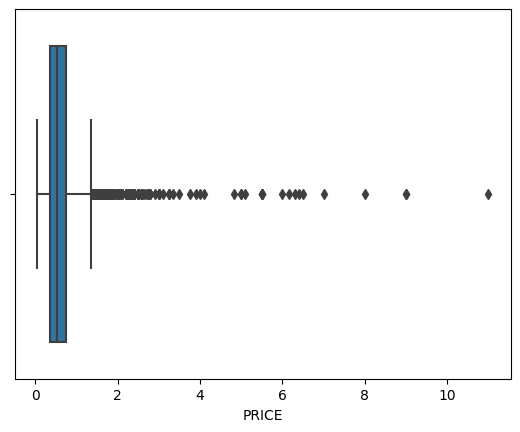

In [29]:
sns.boxplot(x=rent_res_apartment["PRICE"])

In [30]:
rent_res_apartment.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
1876,https://99acres.com/S70947422,gurgaon,7.0,109.0,6400.0,4 bhk flat in sector 42 gurgaon,beautiful fully furnished well maintained 4bhk...,residential apartment,4.0,dlf the magnolias
1877,https://99acres.com/S70270818,gurgaon,8.0,87.0,7400.0,4 bhk flat in sector 42 gurgaon,dlf the camellias is the most preferred destin...,residential apartment,4.0,dlf the camellias
1878,https://99acres.com/O70270362,gurgaon,9.0,121.0,7400.0,4 bhk flat in sector 42 gurgaon,a 4 bhk flat for rent in sector 42 gurgaon clo...,residential apartment,4.0,dlf the camellias
1879,https://99acres.com/Y70270506,gurgaon,9.0,121.0,7400.0,4 bhk flat in sector 42 gurgaon,this 4 bhk flat in sector 42 gurgaon is availa...,residential apartment,4.0,dlf the camellias
1880,https://99acres.com/D68894450,gurgaon,11.0,146.0,10777.0,5 bhk flat in sector 42 gurgaon,a 4 bhk duplex flat for rent in sector 42 gurg...,residential apartment,5.0,dlf the magnolias


For rental properties `PRICE_SQFT` feature is not useful because it was clculated just by divding the `AREA` from `PRICE` of the property.

#### Drop `rental apartments` from `residential apartment` dataframe

In [31]:
res_apartment = res_apartment.drop(
    index=res_apartment[res_apartment["PROP_ID"].isin(rent_res_apartment["PROP_ID"])].index,
    errors="ignore",
).reset_index(drop=True)
res_apartment.shape

(4040, 10)

#### Conclusion

- **Convention for Rental Apartments:** `(PRICE<20L) & (" rent " in DESCRIPTION)`.
- They are essential for the project because they enough to train a model.

## Residential Apartment

**(after dropping rental apartments)**

In [32]:
print(res_apartment.shape)
res_apartment.head()

(4040, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/A70391034,gurgaon,5.00,78.0,6400.0,4 bhk flat in sector 42 gurgaon,a beautiful and well maintained apartment is a...,residential apartment,4.0,dlf the magnolias
1,https://99acres.com/O62108342,gurgaon,5.25,82.0,6350.0,4 bhk flat in sector 42 gurgaon,dlf magnolia is aimed at giving you an experie...,residential apartment,4.0,dlf the magnolias
2,https://99acres.com/D45615637,gurgaon,5.75,76.0,6400.0,4 bhk flat in sector 42 gurgaon,located in the floodlit golf course of gurgaon...,residential apartment,4.0,dlf the magnolias
3,https://99acres.com/O70264786,gurgaon,6.20,85.0,6400.0,4 bhk flat in sector 42 gurgaon,this property is 4 bhk with 6 balconies. modul...,residential apartment,4.0,dlf the magnolias
4,https://99acres.com/X58352256,gurgaon,6.50,102.0,6350.0,4 bhk flat in sector 42 gurgaon,dlf magnolias dlf magnolia is aimed at giving...,residential apartment,4.0,dlf the magnolias


<Axes: xlabel='PRICE'>

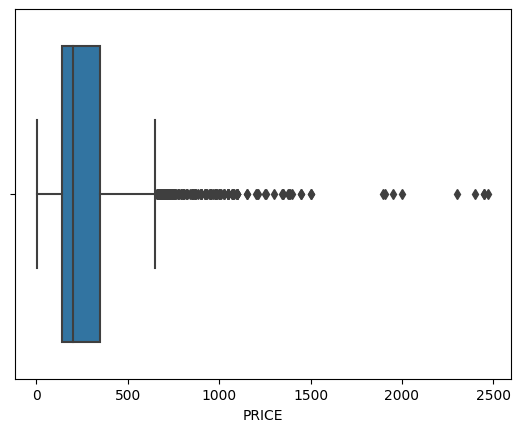

In [33]:
sns.boxplot(x=res_apartment["PRICE"])

<Axes: xlabel='PRICE'>

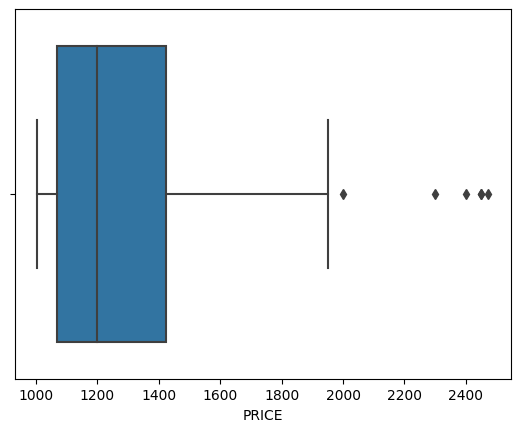

In [34]:
sns.boxplot(x=res_apartment.query("PRICE>1000")["PRICE"])

In [35]:
res_apartment.query("PRICE<15")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/A70391034,gurgaon,5.00,78.0,6400.0,4 bhk flat in sector 42 gurgaon,a beautiful and well maintained apartment is a...,residential apartment,4.0,dlf the magnolias
1,https://99acres.com/O62108342,gurgaon,5.25,82.0,6350.0,4 bhk flat in sector 42 gurgaon,dlf magnolia is aimed at giving you an experie...,residential apartment,4.0,dlf the magnolias
2,https://99acres.com/D45615637,gurgaon,5.75,76.0,6400.0,4 bhk flat in sector 42 gurgaon,located in the floodlit golf course of gurgaon...,residential apartment,4.0,dlf the magnolias
3,https://99acres.com/O70264786,gurgaon,6.20,85.0,6400.0,4 bhk flat in sector 42 gurgaon,this property is 4 bhk with 6 balconies. modul...,residential apartment,4.0,dlf the magnolias
4,https://99acres.com/X58352256,gurgaon,6.50,102.0,6350.0,4 bhk flat in sector 42 gurgaon,dlf magnolias dlf magnolia is aimed at giving...,residential apartment,4.0,dlf the magnolias
5,https://99acres.com/Z64619730,gurgaon,7.50,104.0,7196.0,4 bhk flat in sector 42 gurgaon,golf drive communities countrys finest living....,residential apartment,4.0,dlf the camellias
6,https://99acres.com/K21691199,gurgaon,8.50,63.0,10777.0,5 bhk flat in sector 42 gurgaon,"penthouse, corner unit is available at higher ...",residential apartment,5.0,dlf the magnolias
7,https://99acres.com/Y70623172,gurgaon,8.50,114.0,7400.0,4 bhk flat in sector 42 gurgaon,the camellia 4 bhk apartment area 7400 sq.ft. ...,residential apartment,4.0,dlf the camellias


In [36]:
res_apartment.query("AREA>5000").sample(7)

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
3663,https://99acres.com/V70234078,gurgaon,530.0,9906.0,5350.0,4 bhk flat in gwal pahari,"at paras quartier gurgaon, tower q is a remark...",residential apartment,4.0,paras quartier
3871,https://99acres.com/Z48287723,gurgaon,700.0,12068.0,5800.0,5 bhk flat in sector 47 gurgaon,key in hand----------- urgently available for...,residential apartment,5.0,bestech park view spa
775,https://99acres.com/G69973822,gurgaon,125.0,8680.0,15500.0,2 bhk flat in sector 85 gurgaon,"situated in sector 85 gurgaon, godrej air is a...",residential apartment,2.0,godrej air
5,https://99acres.com/Z64619730,gurgaon,7.5,104.0,7196.0,4 bhk flat in sector 42 gurgaon,golf drive communities countrys finest living....,residential apartment,4.0,dlf the camellias
3459,https://99acres.com/J70283824,gurgaon,450.0,6923.0,6500.0,4 bhk flat in sector 104 gurgaon,check out this 4 bhk apartment for sale in ats...,residential apartment,4.0,ats triumph
4002,https://99acres.com/B68371078,gurgaon,1068.0,13475.0,7928.0,4 bhk flat in sector 76 gurgaon,"own a 4 bhk apartment in whiteland the aspen, ...",residential apartment,4.0,whiteland the aspen
4006,https://99acres.com/N70881528,gurgaon,1100.0,11000.0,10000.0,5 bhk flat in sector 22 gurgaon,location advantages 2 kms from nh - 8 close pr...,residential apartment,5.0,ambience creacions


<Axes: xlabel='PRICE'>

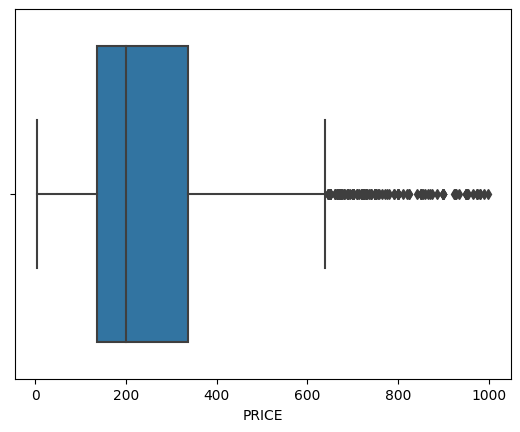

In [37]:
sns.boxplot(x=res_apartment.query("PRICE<1000")["PRICE"])

In [38]:
summary.custom_describe(res_apartment[imp_cols])

,PRICE,AREA,PRICE_SQFT
count,4040.000,4040.000,4040.000
mean,268.606,2250.178,12471.280
std,215.965,1689.003,11329.057
min,5.000,342.000,63.000
1%,30.000,595.560,4078.780
5%,65.000,1084.800,5554.650
25%,138.000,1620.000,8051.000
50%,200.000,2000.000,10656.500
75%,345.000,2588.000,14417.250
95%,650.000,3950.000,22581.650


### Conclusion

- Now this `PROPERTY_TYPE` is good to use for model building.
- Just need to investigate the lower `PRICE` values between **`0-1`%tile**.

## Independent Builder Floors

In [39]:
print(ind_floor.shape)
ind_floor.head()

(2467, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/V70318584,gurgaon,0.12999,8.0,1464.0,1 bhk independent builder floor in sector 22 g...,only 1 big sie bed room set available for rent...,independent/builder floor,1.0,saksham welfare association
1,https://99acres.com/A70375250,gurgaon,0.14500,16.0,900.0,1 bhk independent builder floor in sector 21 g...,one bhk builders floor apartment for rent in s...,independent/builder floor,1.0,sector 21 rwa
2,https://99acres.com/S70666054,gurgaon,0.15000,14.0,1000.0,3 bhk independent builder floor in ashok vihar...,carefully laid out in the prime location of gu...,independent/builder floor,3.0,NaN
3,https://99acres.com/I70134496,gurgaon,0.15000,15.0,950.0,2 bhk independent builder floor in sector 23a ...,this is park facing property front of 15 acre ...,independent/builder floor,2.0,NaN
4,https://99acres.com/C70257788,gurgaon,0.15500,14.0,1092.0,2 bhk independent builder floor in sector 83 g...,this 2 bhk flat is located on 1st floor out of...,independent/builder floor,2.0,vatika emilia floors


<Axes: xlabel='PRICE'>

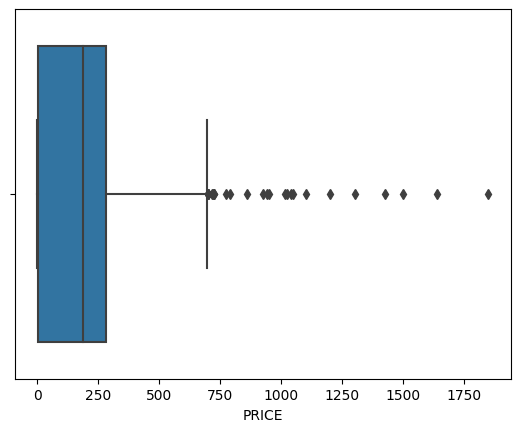

In [40]:
sns.boxplot(x=ind_floor["PRICE"])

<Axes: xlabel='AREA'>

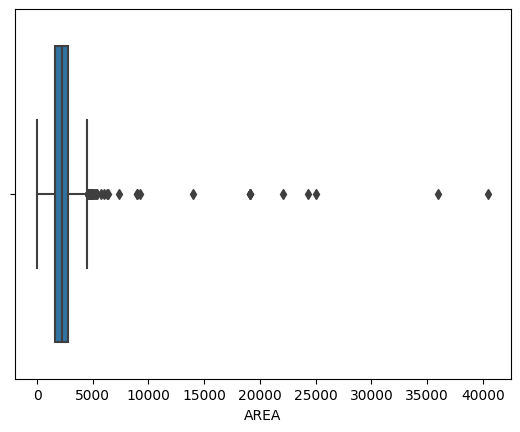

In [41]:
sns.boxplot(x=ind_floor["AREA"])

In [42]:
ind_floor.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
2462,https://99acres.com/X70954332,gurgaon,1303.0,73111.0,1782.0,3 bhk independent builder floor in sector 92 g...,"dlf garden city floors in sector-92, gurgaon b...",independent/builder floor,3.0,dlf garden city floors
2463,https://99acres.com/T70450364,gurgaon,1425.0,7125.0,25000.0,55 bhk independent builder floor in sector 38 ...,"this is agood for investment ,its a rented gue...",independent/builder floor,55.0,huda floor
2464,https://99acres.com/D66752054,gurgaon,1500.0,214285.0,9198.0,5 bhk independent builder floor in dlf phase 1,its a ultra super luxury 1022 sq.yd builder fl...,independent/builder floor,5.0,dlf qutub plaza
2465,https://99acres.com/U70747920,gurgaon,1640.0,164000.0,9000.0,5 bhk independent builder floor in dlf phase 1,available for sale luxury designer builder flo...,independent/builder floor,5.0,dlf city plots
2466,https://99acres.com/Y70180788,gurgaon,1850.0,105714.0,1750.0,3 bhk independent builder floor in sector 63 g...,gated low rise township with all modern amenities,independent/builder floor,3.0,NaN


### Extract `Rental Independent Builder Floors`

In [43]:
rent_ind_floor = pd.concat(
    [
        ind_floor[ind_floor["DESCRIPTION"].str.contains(" rent ") & (ind_floor["PRICE"] < 20)],
        ind_floor.query("PRICE<5"),
    ]
).drop_duplicates(ignore_index=True)
print(rent_ind_floor.shape)
rent_ind_floor.head()

(643, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/V70318584,gurgaon,0.12999,8.0,1464.0,1 bhk independent builder floor in sector 22 g...,only 1 big sie bed room set available for rent...,independent/builder floor,1.0,saksham welfare association
1,https://99acres.com/A70375250,gurgaon,0.14500,16.0,900.0,1 bhk independent builder floor in sector 21 g...,one bhk builders floor apartment for rent in s...,independent/builder floor,1.0,sector 21 rwa
2,https://99acres.com/S70666054,gurgaon,0.15000,14.0,1000.0,3 bhk independent builder floor in ashok vihar...,carefully laid out in the prime location of gu...,independent/builder floor,3.0,NaN
3,https://99acres.com/A70122022,gurgaon,0.15500,17.0,877.0,1 bhk independent builder floor in sector 23a ...,one bhk builders floor apartment for rent in s...,independent/builder floor,1.0,progressive rwa
4,https://99acres.com/U71005354,gurgaon,0.16500,33.0,500.0,1 bhk independent builder floor in c block sus...,fully furnished one room set for rent in susha...,independent/builder floor,1.0,ansal


<Axes: xlabel='PRICE'>

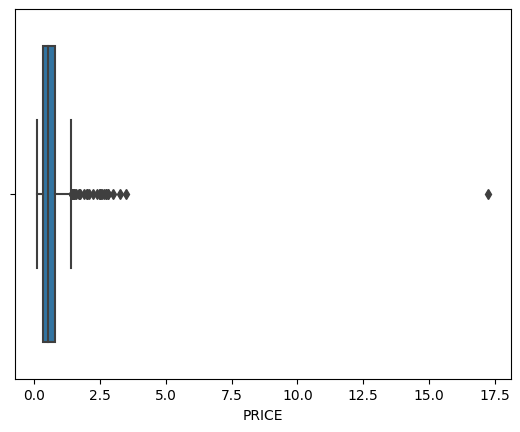

In [44]:
sns.boxplot(x=rent_ind_floor["PRICE"])

<Axes: xlabel='AREA'>

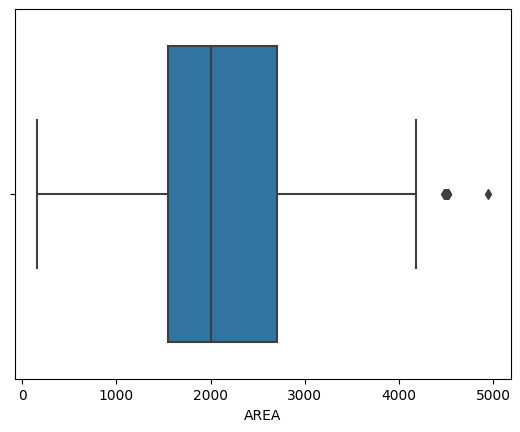

In [45]:
sns.boxplot(x=rent_ind_floor["AREA"])

In [46]:
rent_ind_floor.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
638,https://99acres.com/B70966808,gurgaon,2.4,480.0,4500.0,4 bhk independent builder floor in dlf phase 1,ultra luxury floor prime location near metro ...,independent/builder floor,4.0,dlf city plots
639,https://99acres.com/L70722302,gurgaon,2.5,55.0,4500.0,4 bhk independent builder floor in dlf phase 2,brand new builderfloor in dlf phase 2 gurgaon ...,independent/builder floor,4.0,NaN
640,https://99acres.com/L70257462,gurgaon,2.6,520.0,4500.0,4 bhk independent builder floor in dlf phase 1,this property is in very good location of dlf ...,independent/builder floor,4.0,NaN
641,https://99acres.com/F70450418,gurgaon,2.8,557.0,4518.0,5 bhk independent builder floor in dlf phase 1,beautiful duplex on one of the most posh and c...,independent/builder floor,5.0,NaN
642,https://99acres.com/S70376458,gurgaon,3.5,1250.0,2520.0,4 bhk independent builder floor in sector 46 g...,sector 46 gurgaon entire building is for 4 bed...,independent/builder floor,4.0,NaN


In [47]:
summary.custom_describe(rent_ind_floor[imp_cols])

,PRICE,AREA,PRICE_SQFT
count,643.000,643.000,643.000
mean,0.691,2146.871,101.709
std,0.811,949.451,163.847
min,0.130,160.000,8.000
1%,0.165,325.200,10.420
5%,0.211,712.800,15.000
25%,0.350,1550.000,24.000
50%,0.550,2000.000,34.000
75%,0.780,2700.000,128.500
95%,1.500,4500.000,359.800


#### Conclusions

- There is one property which has high price and considered as a rental property. I cannot remove it because my constrains doesn't allow it. I can remove it will exporting the data.
- Although `Rental Independent Builder Floors` are also in amount to create ML model. I can use it to make one.

### Drop `Rental Independent Builder Floors`

In [48]:
ind_floor = ind_floor.drop(
    index=ind_floor[ind_floor["PROP_ID"].isin(rent_ind_floor["PROP_ID"])].index,
).reset_index(drop=True)

print(ind_floor.shape)
ind_floor.head()

(1824, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/J66486956,gurgaon,32.0,3137.0,1020.0,3 bhk independent builder floor in rajendra park,property near to gurgaon railway modular kitch...,independent/builder floor,3.0,rana affordable floors
1,https://99acres.com/S66486900,gurgaon,33.0,3473.0,950.0,3 bhk independent builder floor in rajendra park,property near to gurgaon railway modular kitch...,independent/builder floor,3.0,rana affordable floors
2,https://99acres.com/V50446696,gurgaon,35.0,4223.0,900.0,2 bhk independent builder floor in patel nagar,why pay rent get ready to move 2 & 3 bhk fla...,independent/builder floor,2.0,NaN
3,https://99acres.com/H48380201,gurgaon,35.0,3555.0,900.0,2 bhk independent builder floor in shanti nagar,why pay rent get ready to move fully furnished...,independent/builder floor,2.0,tanishq residency
4,https://99acres.com/Y53314794,gurgaon,35.0,4226.0,900.0,2 bhk independent builder floor in sukhrali,book your dream home in heart of gurgaon bes...,independent/builder floor,2.0,NaN


<Axes: xlabel='PRICE'>

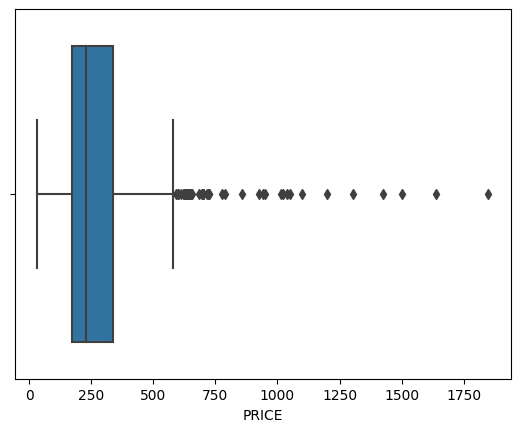

In [49]:
sns.boxplot(x=ind_floor["PRICE"])

<Axes: xlabel='AREA'>

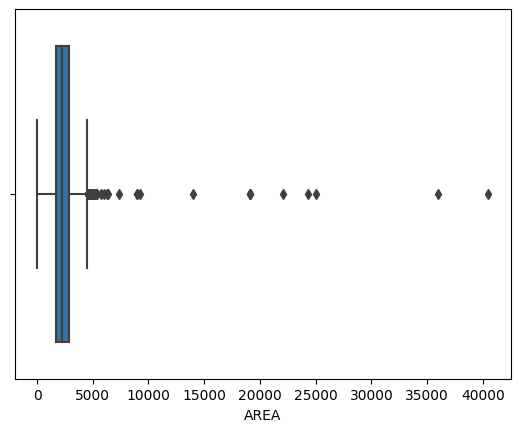

In [50]:
sns.boxplot(x=ind_floor["AREA"])

In [51]:
summary.custom_describe(ind_floor[imp_cols])

,PRICE,AREA,PRICE_SQFT
count,1824.000,1824.000,1824.000
mean,262.762,2503.332,39627.973
std,154.369,1926.676,61371.133
min,32.000,30.000,1243.000
1%,39.230,373.570,4000.000
5%,85.000,1090.150,6444.300
25%,170.000,1709.500,9782.000
50%,229.000,2250.000,12962.000
75%,335.000,2835.000,71644.250
95%,520.000,4500.000,120786.800


#### Conclusions

- Ready to build a ML model on it. Almost all the outliers were handle specially of `PRICE` and `AREA` feature.
- But, there are some outliers values which are need to be handle.

## Residential Land

In [52]:
print(res_land.shape)
res_land.head()

(979, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/R70515244,gurgaon,2.3,958.0,2160.0,residential land / plot in malibu town,"lemon street, malibu town, gurgaon, haryana 3s...",residential land,NaN,malibu towne
1,https://99acres.com/J70707946,gurgaon,9.0,15000.0,60.0,residential land / plot in shree ram colony,sector 102 near by amstoria bptp plots he plo...,residential land,NaN,sector 102
2,https://99acres.com/Q69980568,gurgaon,12.6,2000.0,630.0,residential land / plot in maruti kunj,etr developers pvt. ltd. presents kuldeep aven...,residential land,NaN,NaN
3,https://99acres.com/P70125644,gurgaon,15.0,12500.0,120.0,residential land / plot in bhondsi,planning to purchase a plot in gurgaon? this p...,residential land,NaN,shyam kunj
4,https://99acres.com/Z70930360,gurgaon,15.0,15000.0,900.0,residential land / plot in farrukh nagar,we have a polt available for sale in farrukh n...,residential land,NaN,NaN


<Axes: xlabel='PRICE'>

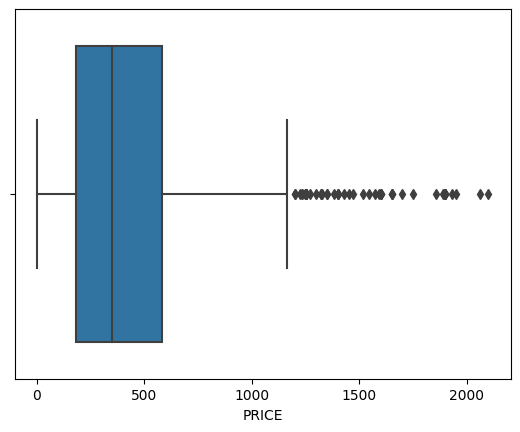

In [53]:
sns.boxplot(x=res_land["PRICE"])

<Axes: xlabel='AREA'>

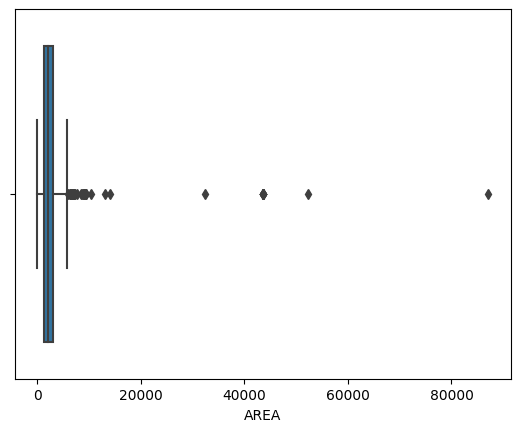

In [54]:
sns.boxplot(x=res_land["AREA"])

In [55]:
res_land.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
974,https://99acres.com/L70584234,gurgaon,1900.0,179584.0,9522.0,residential land / plot in malibu town,it is a good society. all amenities near by li...,residential land,NaN,malibu towne
975,https://99acres.com/F70607776,gurgaon,1930.0,193000.0,9000.0,residential land / plot in malibu town,"check out this plot in malibu town, gurgaon, a...",residential land,NaN,malibu towne
976,https://99acres.com/Z70483564,gurgaon,1950.0,195000.0,9000.0,residential land / plot in malibu town,looking for a plot in a prime location of gurg...,residential land,NaN,malibu towne
977,https://99acres.com/Q70255624,gurgaon,2060.0,253382.0,7317.0,residential land / plot in sushant lok phase 1,urgent for sale confirm plot main 18 mtr road...,residential land,NaN,ansal sushant lok plots
978,https://99acres.com/N70028022,gurgaon,2100.0,1200000.0,1575.0,residential land / plot in sector 82a gurgaon,planning to purchase a plot in gurgaon? this p...,residential land,NaN,vatika horizon sector 82 a


In [56]:
summary.custom_describe(res_land[imp_cols])

,PRICE,AREA,PRICE_SQFT
count,979.000,979.000,9.790000e+02
mean,445.417,2979.901,4.793549e+05
std,363.384,5372.854,3.717856e+06
min,2.300,60.000,9.580000e+02
1%,21.230,150.000,7.608840e+03
5%,87.035,582.300,1.848330e+04
25%,181.500,1350.000,1.000000e+05
50%,350.000,2115.000,1.400000e+05
75%,582.500,3150.000,1.893665e+05
95%,1232.000,5833.800,2.817112e+05


### Conclusions

- **Resdential Lands** are generally costly but there are very low priced lands are present which are need to be handle.
- There are unexpectedly high area lands which can repersents as outliers.

## Independent House

In [57]:
print(ind_house.shape)
ind_house.head()

(617, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/G70811510,gurgaon,0.12000,75.0,1440.0,2 bedroom house in acharya puri extension,this is my own property available on 1st floor...,independent house/villa,2.0,NaN
1,https://99acres.com/C67120292,gurgaon,0.14000,17.0,900.0,3 bedroom house in dwarka expressway gurgaon,house/villa available for rent in dwarka expre...,independent house/villa,3.0,NaN
2,https://99acres.com/O70340856,gurgaon,0.18999,93.0,1836.0,1 bedroom house in sector 23 gurgaon,independent 2bed room set in sector 23 nearby ...,independent house/villa,1.0,all punjabi welfare association
3,https://99acres.com/I70727814,gurgaon,0.19000,105.0,1620.0,2 bedroom house in sector 83 gurgaon,a lovely 2 bhk house for rent in sector 83 gur...,independent house/villa,2.0,vatika emilia floors
4,https://99acres.com/T70738346,gurgaon,0.20000,14.0,1350.0,2 bedroom house in sector 23 gurgaon,"that property is at a very good location, all ...",independent house/villa,2.0,NaN


<Axes: xlabel='PRICE'>

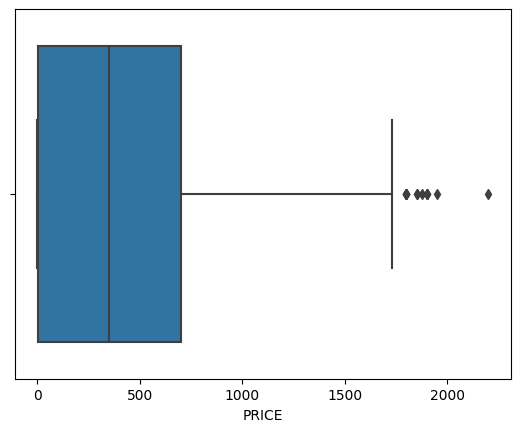

In [58]:
sns.boxplot(x=ind_house["PRICE"])

<Axes: xlabel='AREA'>

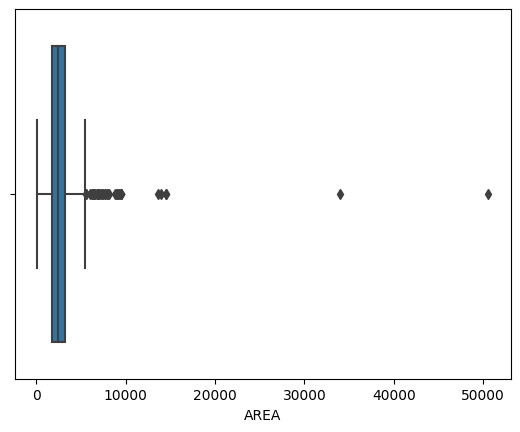

In [59]:
sns.boxplot(x=ind_house["AREA"])

In [60]:
ind_house.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
612,https://99acres.com/A70022076,gurgaon,1900.0,345454.0,4950.0,6 bedroom house in dlf phase 1,6bhk ultra luxurious independent kothi in bloc...,independent house/villa,6.0,dlf city plots
613,https://99acres.com/M70013508,gurgaon,1900.0,380000.0,4500.0,6 bedroom house in dlf phase 1,"dlf phase 1, gurgaon, haryana beautifully well...",independent house/villa,6.0,NaN
614,https://99acres.com/O70971462,gurgaon,1900.0,380000.0,4500.0,5 bedroom house in sector 66 gurgaon,"emaar mgf marbella in sector 66, gurgaon is a ...",independent house/villa,5.0,emaar mgf marbella
615,https://99acres.com/Q69047570,gurgaon,1950.0,200000.0,8775.0,5 bedroom house in sector 48 gurgaon,exclusive inventory for sale in 287/360/500/75...,independent house/villa,5.0,vipul tatvam villa
616,https://99acres.com/G70725736,gurgaon,2200.0,438247.0,4518.0,4 bedroom house in dlf phase 1,park facing 2 side open both side 12 meter wid...,independent house/villa,4.0,dlf city plots


### Extract `Rental Independent House`

In [61]:
rent_ind_house = ind_house[
    ind_house["DESCRIPTION"].str.contains(" rent ") & (ind_house["PRICE"] < 20)
].reset_index(drop=True)
print(rent_ind_house.shape)
rent_ind_house.head()

(99, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/C67120292,gurgaon,0.14,17.0,900.0,3 bedroom house in dwarka expressway gurgaon,house/villa available for rent in dwarka expre...,independent house/villa,3.0,NaN
1,https://99acres.com/I70727814,gurgaon,0.19,105.0,1620.0,2 bedroom house in sector 83 gurgaon,a lovely 2 bhk house for rent in sector 83 gur...,independent house/villa,2.0,vatika emilia floors
2,https://99acres.com/O70498492,gurgaon,0.24,25.0,930.0,3 bedroom house in sector 82 gurgaon,this 3 bhk house for rent in sector 82 gurgaon...,independent house/villa,3.0,vatika independent floors
3,https://99acres.com/F70727964,gurgaon,0.25,104.0,2160.0,3 bedroom house in sector 84 gurgaon,find this 3 bhk house for rent in sector 84 gu...,independent house/villa,3.0,sas arcadia
4,https://99acres.com/R70806422,gurgaon,0.28,280.0,900.0,2 bedroom house in sector 40 gurgaon,this house is located in sector 40. the size o...,independent house/villa,2.0,NaN


<Axes: xlabel='PRICE'>

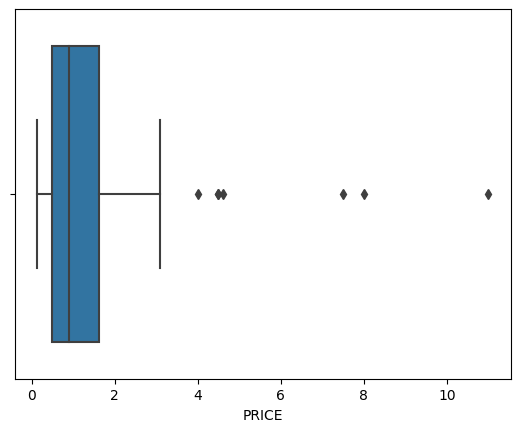

In [62]:
sns.boxplot(x=rent_ind_house["PRICE"])

<Axes: xlabel='AREA'>

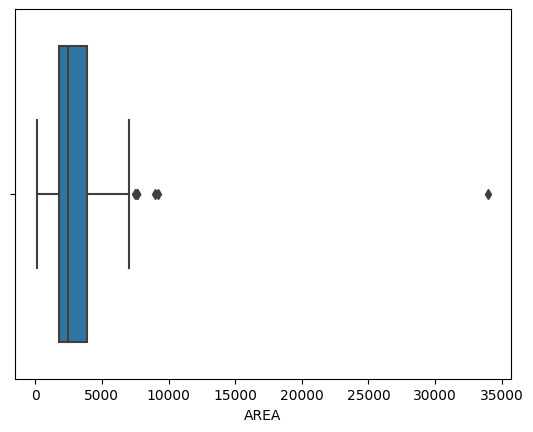

In [63]:
sns.boxplot(x=rent_ind_house["AREA"])

In [64]:
rent_ind_house.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
94,https://99acres.com/J70873218,gurgaon,4.5,1424.0,2844.0,16 bedroom house in dlf phase 3,available for rent in dlf phase 3 . 4 floors b...,independent house/villa,16.0,cyber city
95,https://99acres.com/G69234356,gurgaon,4.6,73.0,6500.0,6 bedroom house in sector 54 gurgaon,available for rent 6bhk villa only for mnc com...,independent house/villa,6.0,emaar the palm springs
96,https://99acres.com/Y70230934,gurgaon,7.5,81.0,9198.0,5 bedroom house in dlf phase 1,available for rent immediately. prime location...,independent house/villa,5.0,NaN
97,https://99acres.com/I70284162,gurgaon,8.0,800.0,9000.0,35 bedroom house in b block sushant lok phase 1,gesthouse for rent b block sushant lok 1 gurga...,independent house/villa,35.0,NaN
98,https://99acres.com/R70716848,gurgaon,11.0,2200.0,4500.0,36 bedroom house in sector 46 gurgaon,guest house for lease 36 rooms ultra luxury fu...,independent house/villa,36.0,rwa sector 46


### Drop `Rental Houses` from `Independent House` dataframe

In [65]:
ind_house = ind_house.drop(
    index=ind_house[ind_house["PROP_ID"].isin(rent_ind_house["PROP_ID"])].index
).reset_index(drop=True)
print(ind_house.shape)
ind_house.head()

(518, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/G70811510,gurgaon,0.12000,75.0,1440.0,2 bedroom house in acharya puri extension,this is my own property available on 1st floor...,independent house/villa,2.0,NaN
1,https://99acres.com/O70340856,gurgaon,0.18999,93.0,1836.0,1 bedroom house in sector 23 gurgaon,independent 2bed room set in sector 23 nearby ...,independent house/villa,1.0,all punjabi welfare association
2,https://99acres.com/T70738346,gurgaon,0.20000,14.0,1350.0,2 bedroom house in sector 23 gurgaon,"that property is at a very good location, all ...",independent house/villa,2.0,NaN
3,https://99acres.com/I70876652,gurgaon,0.20000,111.0,1620.0,2 bedroom house in sector 83 gurgaon,"independent floors are spacious, well laid out...",independent house/villa,2.0,vatika emilia floors
4,https://99acres.com/K70628904,gurgaon,0.25000,35.0,700.0,1 bedroom house in rapid metro sector 55,this luxurious fully furnished 1bhk is located...,independent house/villa,1.0,NaN


<Axes: xlabel='PRICE'>

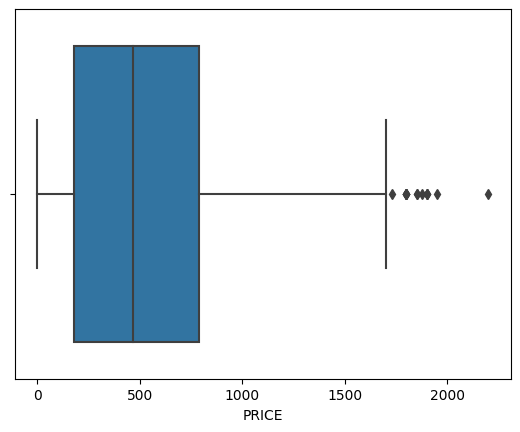

In [66]:
sns.boxplot(x=ind_house["PRICE"])

<Axes: xlabel='AREA'>

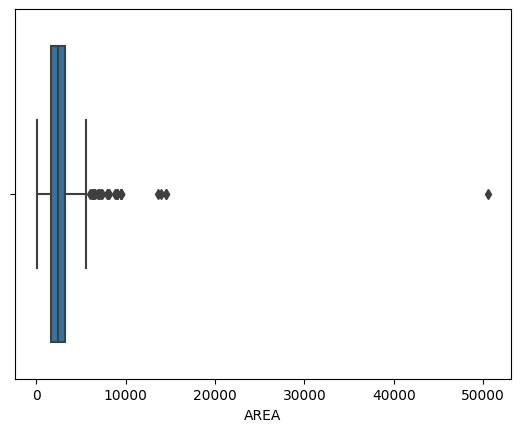

In [67]:
sns.boxplot(x=ind_house["AREA"])

In [68]:
summary.custom_describe(ind_house[imp_cols])

,PRICE,AREA,PRICE_SQFT
count,518.000,518.000,518.000
mean,532.125,2927.948,165865.894
std,444.589,2901.940,294249.235
min,0.120,122.000,8.000
1%,0.253,200.000,18.510
5%,0.500,500.000,39.850
25%,180.500,1622.250,16457.500
50%,465.000,2430.000,168530.000
75%,788.750,3240.000,248354.000
95%,1350.750,6574.200,350131.550


### Conclusions

- There are some houses which are also **available for rent**. I can merge this data into `rent_apartment` data because they can relate to each other.

# Conclusions

### Rental Properties

- Merge `rent_apartment` and `rent_ind_house`.
- There is also a data about **Rental Independent Builder Floors** whic can be consider to build a seperate ML model.

> **From this section,** their are two ML model can be build.

### Residential Apartments

- This contains about 4k+ properties and it is good to go data. Almost ready to build the model, just need some care/improvement to become perfect.

### Independent Builder Floors

- Contains about 1800 properties.
- There are some ouliters in the `AREA` feature.

### Residential Land

- Contains about 980 properties.
- There are some outliers in `AREA` feature.

### Independent Houses

- Contains about 500 properties and about 99 properties are rental.
- `AREA` feature has some outliers.
- Merge the rental independent houses into rental residential appartment because they seems similar.
- Rental properties have many outliers.

In [69]:
print(f"{res_apartment.shape = }")
print(f"{rent_res_apartment.shape = }")
print()
print(f"{ind_floor.shape = }")
print(f"{rent_ind_floor.shape = }")
print()
print(f"{res_land.shape = }")
print()
print(f"{ind_house.shape = }")
print(f"{rent_ind_house.shape = }")

res_apartment.shape = (4040, 10)
rent_res_apartment.shape = (1881, 10)

ind_floor.shape = (1824, 10)
rent_ind_floor.shape = (643, 10)

res_land.shape = (979, 10)

ind_house.shape = (518, 10)
rent_ind_house.shape = (99, 10)


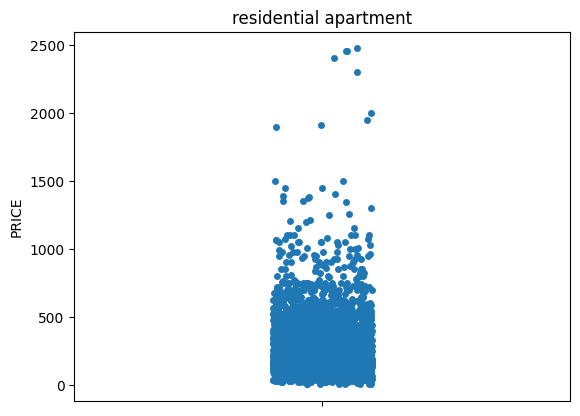

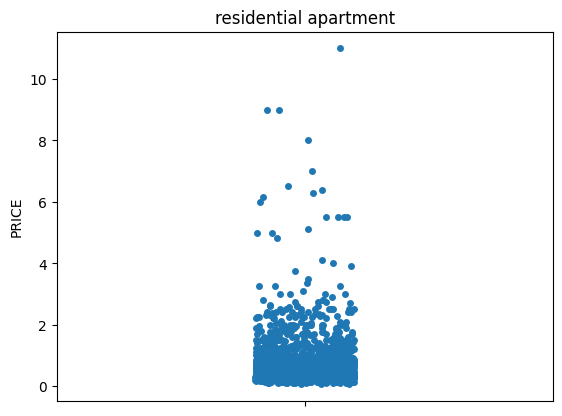

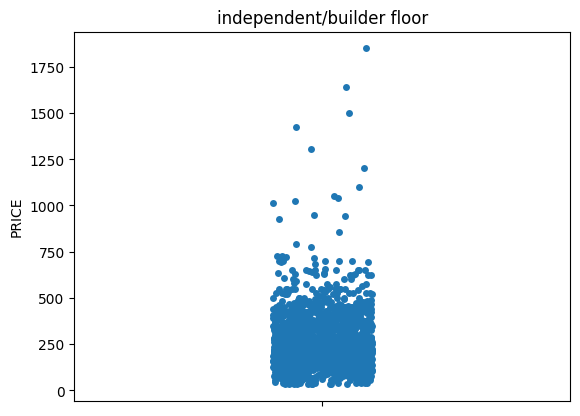

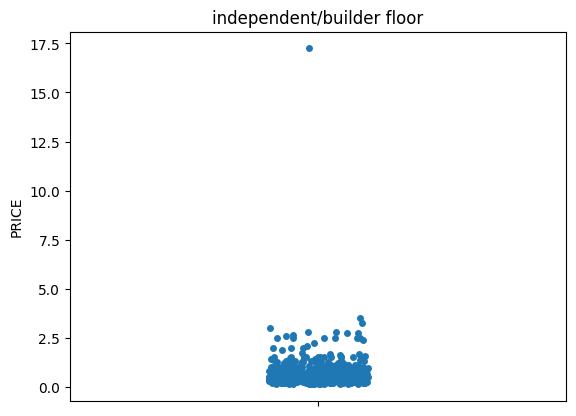

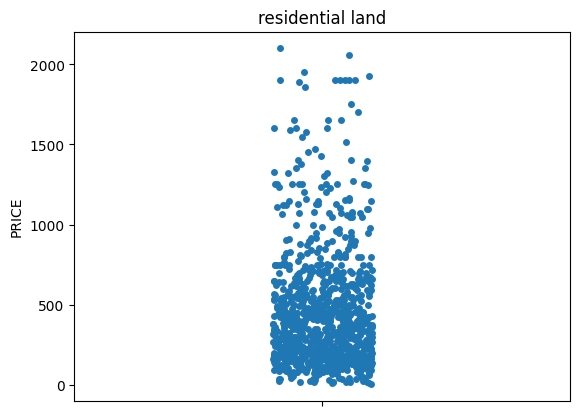

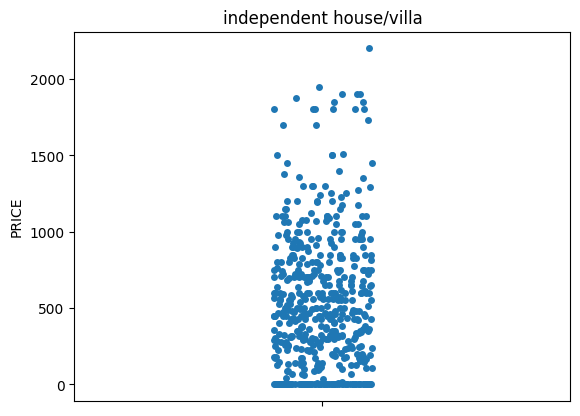

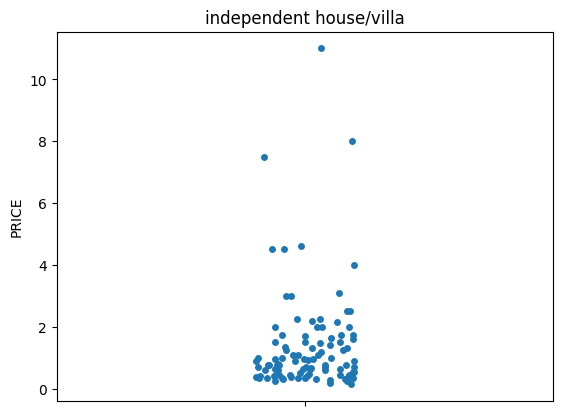

In [70]:
for data in (
    res_apartment,
    rent_res_apartment,
    ind_floor,
    rent_ind_floor,
    res_land,
    ind_house,
    rent_ind_house,
):
    sns.stripplot(data["PRICE"])
    plt.title(f"{data['PROPERTY_TYPE'][0]}")
    plt.show()

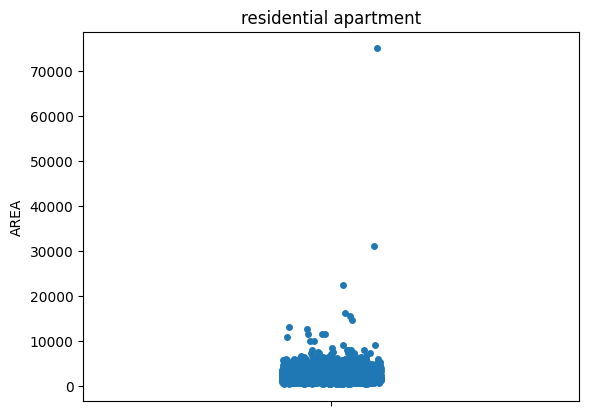

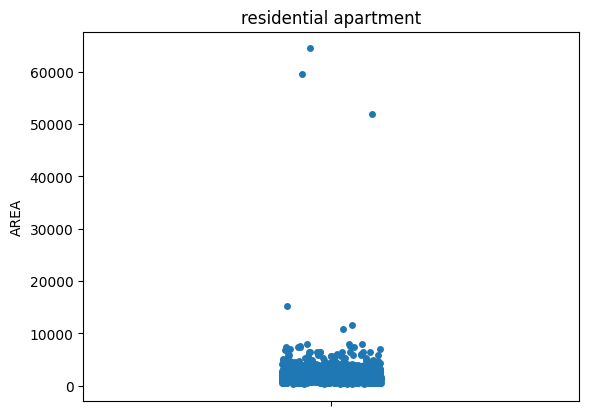

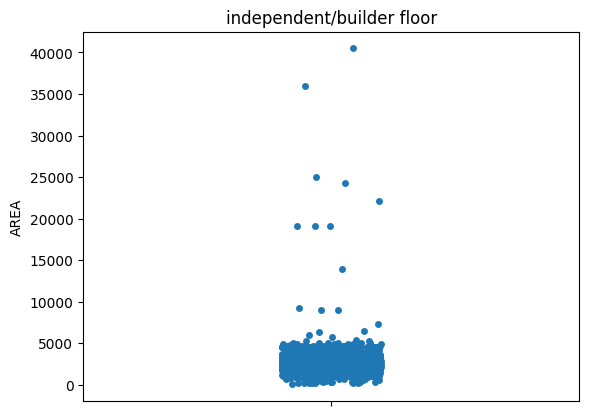

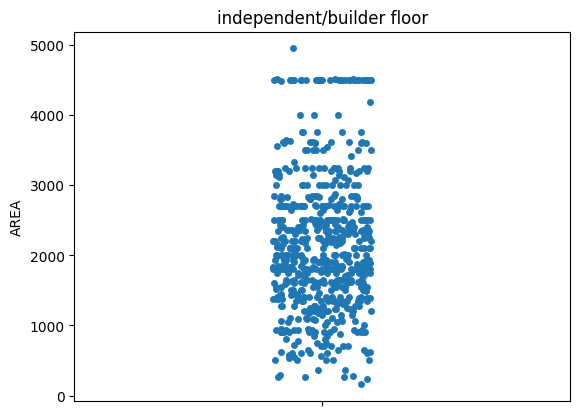

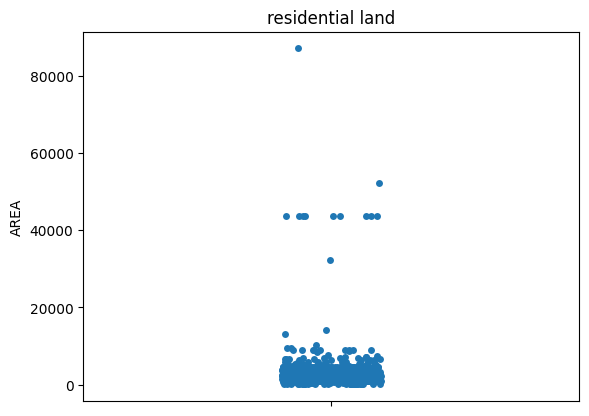

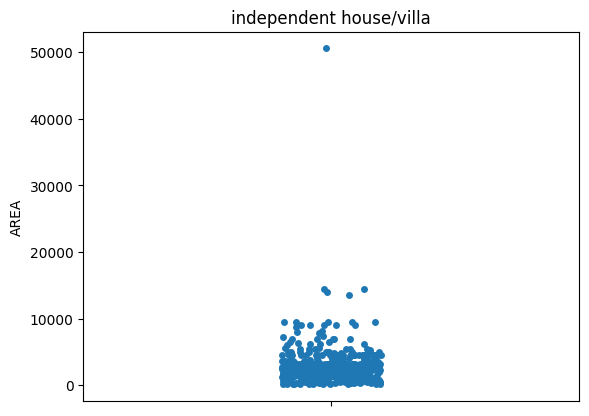

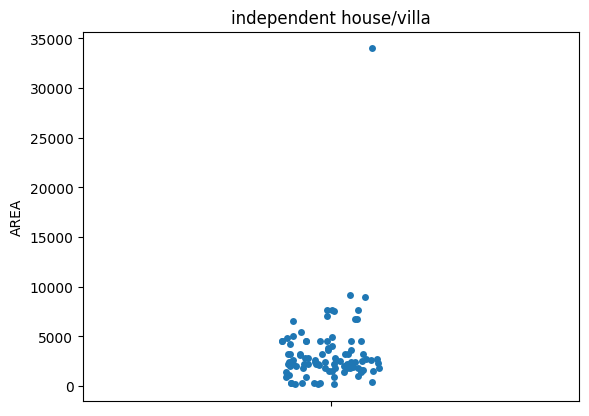

In [71]:
for data in (
    res_apartment,
    rent_res_apartment,
    ind_floor,
    rent_ind_floor,
    res_land,
    ind_house,
    rent_ind_house,
):
    sns.stripplot(data["AREA"])
    plt.title(f"{data['PROPERTY_TYPE'][0]}")
    plt.show()